# Data Science Methodology for Breast Cancer Diagnosis (DSM-BCD)

**Problema.** Colombia presenta limitaciones con respecto al acceso de la detección y el diagnóstico temprano del cáncer, provocado en la mayoría de los casos por factores como el estrato socio-económico, la cobertura del seguro de salud, el origen y la accesibilidad. En promedio, el tiempo de espera de un paciente es de 90 días desde la aparición de los síntomas hasta el diagnóstico de dicho cáncer. La primera acción para reducir la tasa de mortalidad por cáncer de mama debe estar enfocada en la agilidad del diagnóstico y el acceso oportuno a la atención.  Así, el objetivo de esta investigación es aplicar las etapas de la metodología KDD\footnote{Knowledge Discovery in Databases} al conjunto de datos de morbilidad por cáncer entre los años 2019 y 2020 en el municipio de Pereira-Risaralda. Esto con la finalidad de pronosticar y caracterizar el tipo de población mas susceptible de padecer esta enfermedad según su edad, genero, zona y régimen de salud.

**Conjunto de datos.** Un total de 817 muestras de tumores de mama se pedtilaron con cinco plataformas diferentes como se ha descrito previamente (Cancer Genome Atlas Research Network, 2014) y también se pedtilaron 633 casos mediante matriz de proteínas en fase inversa (RPPA)

## Aprendizaje Supervisado


### Multiclass Classification
En el aprendizaje No supervisado, se trabaja con datos sin etiquetar cuya estructura es desconocida. El objetivo será la extracción de información significativa, sin la referencia de variables de salida conocidas, y mediante la exploración de la estructura de dichos datos sin etiquetar

## Desarrollo Multiclass Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
with open('breast_clean_kmeans.csv') as f:
    dataset=pd.read_csv(f, delimiter=',')

In [3]:
dataset.head(10)

,diagnosis_age,american_joint_committee_on_cancer_metastasis_stage_code,neoplasm_disease_lymph_node_stage_american_joint_committee_on_cancer_code,neoplasm_disease_stage_american_joint_committee_on_cancer_code,american_joint_committee_on_cancer_tumor_stage_code,cancer_type_detailed,disease_free_status,er_status_by_ihc,ethnicity_category,fraction_genome_altered,...,race_category,tissue_retrospective_collection_indicator,number_of_samples_per_patient,sample_type,sex,staging_system,surgical_procedure_first,tissue_source_site,tmb_nonsynonymous,person_neoplasm_status
0,70.0,M0,N0,Stage I,T1c,Invasive Breast Carcinoma,0:DiseaseFree,Positive,NOT HISPANIC OR LATINO,8.0,...,WHITE,YES,1,Primary,Female,Sentinel node biopsy alone,Lumpectomy,A1,6.000000e+00,TUMOR FREE
1,59.0,M0,N0,Stage IIA,T2,Breast Invasive Ductal Carcinoma,0:DiseaseFree,Positive,NOT HISPANIC OR LATINO,2474.0,...,WHITE,YES,1,Primary,Female,Sentinel lymph node biopsy plus axillary disse...,Lumpectomy,A1,1.000000e+00,NaN
2,56.0,M0,N0 (i-),Stage I,T1c,Breast Invasive Lobular Carcinoma,0:DiseaseFree,Positive,NOT HISPANIC OR LATINO,2134.0,...,WHITE,YES,1,Primary,Female,Sentinel lymph node biopsy plus axillary disse...,Modified Radical Mastectomy,A1,7.000000e+00,TUMOR FREE
3,54.0,M0,N0,Stage IIA,T2,Breast Invasive Ductal Carcinoma,0:DiseaseFree,Positive,NOT HISPANIC OR LATINO,2015.0,...,WHITE,YES,1,Primary,Female,Sentinel lymph node biopsy plus axillary disse...,Modified Radical Mastectomy,A1,1.266667e+09,TUMOR FREE
4,39.0,M0,N0 (i-),Stage IIA,T2,Breast Mixed Ductal and Lobular Carcinoma,0:DiseaseFree,Negative,NOT HISPANIC OR LATINO,1789.0,...,WHITE,YES,1,Primary,Female,Sentinel node biopsy alone,Lumpectomy,A1,2.600000e+01,TUMOR FREE
5,52.0,M0,N1a,Stage IIB,T2,Breast Invasive Ductal Carcinoma,0:DiseaseFree,Positive,NOT HISPANIC OR LATINO,3313.0,...,WHITE,YES,1,Primary,Female,Sentinel lymph node biopsy plus axillary disse...,Lumpectomy,A1,5.566667e+09,TUMOR FREE
6,39.0,M0,N1a,Stage IIIA,T3,Breast Invasive Ductal Carcinoma,0:DiseaseFree,Positive,NOT HISPANIC OR LATINO,4600.0,...,BLACK OR AFRICAN AMERICAN,YES,1,Primary,Female,Sentinel lymph node biopsy plus axillary disse...,Modified Radical Mastectomy,A1,1.000000e+00,TUMOR FREE
7,54.0,M0,N0 (i-),Stage IIA,T2,Invasive Breast Carcinoma,NaN,Negative,NOT HISPANIC OR LATINO,4163.0,...,ASIAN,YES,1,Primary,Female,Sentinel lymph node biopsy plus axillary disse...,Lumpectomy,A1,3.366667e+09,NaN
8,77.0,M0,N0 (i-),Stage IIA,T2,Breast Invasive Ductal Carcinoma,0:DiseaseFree,Positive,NOT HISPANIC OR LATINO,1807.0,...,WHITE,YES,1,Primary,Male,Sentinel lymph node biopsy plus axillary disse...,Modified Radical Mastectomy,A1,7.333333e+08,TUMOR FREE
9,50.0,MX,N1,Stage IIA,T1c,Breast Invasive Ductal Carcinoma,0:DiseaseFree,Positive,NOT HISPANIC OR LATINO,5518.0,...,WHITE,YES,1,Primary,Female,Sentinel lymph node biopsy plus axillary disse...,Lumpectomy,A1,1.533333e+09,TUMOR FREE


In [4]:
dataset.shape

(818, 46)

In [5]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (777, 46)
Unseen Data For Predictions: (41, 46)


In [6]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'oncotree_code', session_id=123) 

,Description,Value
0,session_id,123
1,Target,oncotree_code
2,Target Type,Multiclass
3,Label Encoded,"BRCA: 0, IDC: 1, ILC: 2, MDLC: 3"
4,Original Data,"(777, 46)"
5,Missing Values,True
6,Numeric Features,7
7,Categorical Features,38
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0070
ridge,Ridge Classifier,0.9982,0.0000,0.9969,0.9982,0.9981,0.9969,0.9970,0.0100
rf,Random Forest Classifier,0.9982,1.0000,0.9969,0.9982,0.9981,0.9969,0.9970,0.1960
ada,Ada Boost Classifier,0.9982,1.0000,0.9969,0.9982,0.9981,0.9969,0.9970,0.0460
gbc,Gradient Boosting Classifier,0.9982,1.0000,0.9969,0.9982,0.9981,0.9969,0.9970,0.2530
et,Extra Trees Classifier,0.9982,1.0000,0.9969,0.9982,0.9981,0.9969,0.9970,0.1740
lightgbm,Light Gradient Boosting Machine,0.9982,1.0000,0.9969,0.9982,0.9981,0.9969,0.9970,0.0390
lda,Linear Discriminant Analysis,0.7884,0.8643,0.7077,0.7816,0.7831,0.6486,0.6510,0.0260
qda,Quadratic Discriminant Analysis,0.6518,0.7975,0.4910,0.7138,0.6726,0.4574,0.4654,0.0170
lr,Logistic Regression,0.5820,0.5369,0.2500,0.3387,0.4282,0.0000,0.0000,0.6340


### Decision Tree Classifier

In [8]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [9]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [10]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [11]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


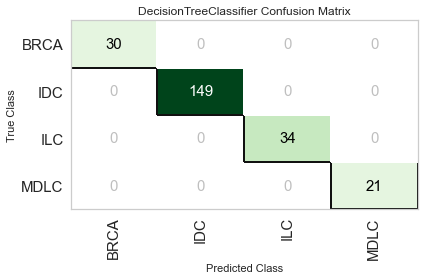

In [12]:
plot_model(tuned_dt, plot = 'confusion_matrix')

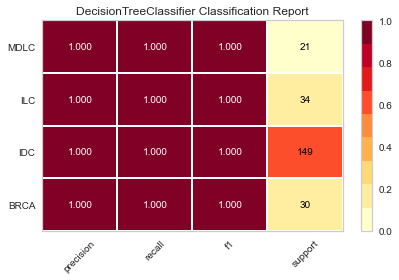

In [13]:
plot_model(tuned_dt, plot = 'class_report')

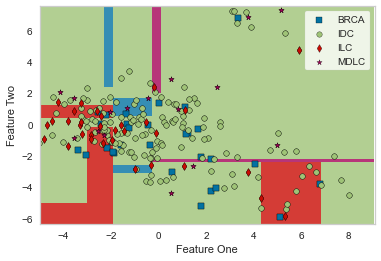

In [14]:
plot_model(tuned_dt, plot='boundary')

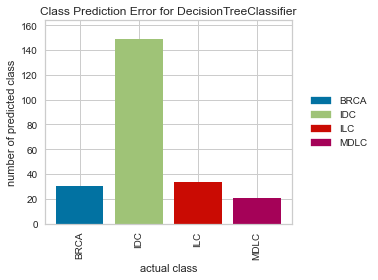

In [15]:
plot_model(tuned_dt, plot = 'error')

In [16]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [17]:
final_dt = finalize_model(tuned_dt)
print(final_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [18]:
predict_dt=predict_model(final_dt,data=dataset)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.0000,1.0000,0,0,0,0,0


In [19]:
predict_dt.groupby("Label").describe()

diagnosis_age                                                      \
              count       mean        std   min   25%   50%   75%   max   
Label                                                                     
BRCA          112.0  58.973214  13.650370  29.0  48.0  59.0  68.0  90.0   
IDC           490.0  57.377551  13.290921  26.0  48.0  57.0  66.0  90.0   
ILC           127.0  62.299213  12.760501  38.0  52.5  62.0  73.0  90.0   
MDLC           88.0  61.579545  12.523744  34.0  54.0  62.5  69.0  87.0   

      fraction_genome_altered               ... tmb_nonsynonymous  \
                        count         mean  ...               75%   
Label                                       ...                     
BRCA                    113.0  2439.858407  ...      1.333333e+09   
IDC                     489.0  3390.603272  ...      1.566667e+09   
ILC                     127.0  1772.236220  ...      1.250000e+09   
MDLC                     88.0  2756.488636  ...      1.466667e+09   

                     Score                                     
                max  count mean  std  min  25%  50%  75%  max  
Label                                                          
BRCA   6.933333e+09  113.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
IDC    9.633333e+09  490.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
ILC    7.166667e+09  127.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
MDLC   7.966667e+09   88.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[4 rows x 88 columns]

In [20]:
#str_list = ['BRCA','IDC','ILC','MDLC']
#for word in str_list:
    #a=predict_dt[predict_dt['Label']==word]
    #a.to_csv(word + '.csv',index=False)